# TP2: Regresión del valor de valor medio de casas en distritos de California

Se requiere construir una regresión que nos permita predecir el valor medio de las casas en distritos de California, 
EEUU (medidos en cientos de miles de dólares $100,000). Este dataset se deriva del censo de 1990 de EEUU, donde cada 
observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EEUU 
publica datos de muestra (un bloque típicamente tiene una población de 600 a 3000 personas).

Los atributos, en el orden en que se guardaron en el dataset, son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

Y el target es:

- `MedHouseVal`: Mediana del costo de casas en el bloque (en unidades de a $100.000)

## Tareas y preguntas a resolver:

1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación 
lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o 
directamente graficar usando un mapa de calor.
2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se 
observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin 
entrar en pruebas de hipótesis?
3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del 
modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su 
respuesta.
4. Calcular las métricas de MSE, MAE y $R^2$ del set de evaluación.
5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el 
mejor valor de $\alpha$, buscando entre [0, 12.5]. Graficar el valor de MSE versus $\alpha$.
6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. 
¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse 
reducido?

## Resolución

### Importación de paquetes y dataset

In [2]:
# ---------------- Paquetes | Funciones a utilizar ----------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

In [3]:
# ---------------- Carga de dataset ----------------

california_housing = fetch_california_housing()

### Modelo de regresión múltiple

#### Preparación de los datos

In [4]:
# ---------------- Definición de variables ----------------

x = california_housing.data # Variables predictoras
y = california_housing.target # Variable a predecir

# Transformación a dataframe
x = pd.DataFrame(x, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Se une todo en un dataframe
df_california = pd.concat([x, y], axis = 1)


In [5]:
# ---------------- Split de datos para entrenamiento | validación ----------------

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=44)

In [6]:
# ---------------- Escalamiento de datos ----------------

# Debido a las diferentes unidades de medida que tienen las variables predictoras,
# habría que escalar los valores.

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Lo transformemos en DataFrames
x_train_scaled = pd.DataFrame(x_train_scaled, columns=california_housing['feature_names'])
x_test_scaled = pd.DataFrame(x_test_scaled, columns=california_housing['feature_names'])

#### Modelo de regresión con datos de entrenamiento

In [7]:
# ---------------- Modelo de regresión ----------------

regresion = LinearRegression().fit(x_train_scaled, y_train)

# ---------------- Valores de intercepto | coeficientes ----------------

coeficientes = pd.DataFrame(data={'nombres' : x_train_scaled.columns,
                   'coef.' : regresion.coef_})
print(f"El valor del intercepto es {round(regresion.intercept_,4) }")
print(f"Los valores de los coeficientes son:")
coeficientes

El valor del intercepto es 2.0692
Los valores de los coeficientes son:


,nombres,coef.
0,MedInc,0.832021
1,HouseAge,0.110757
2,AveRooms,-0.262941
3,AveBedrms,0.318025
4,Population,-0.003204
5,AveOccup,-0.040199
6,Latitude,-0.908260
7,Longitude,-0.875626


### 1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

##### Correlación entre atributos y atributos con target

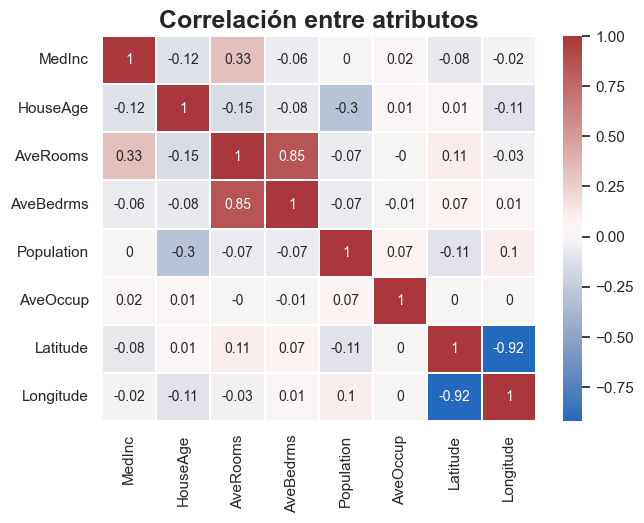

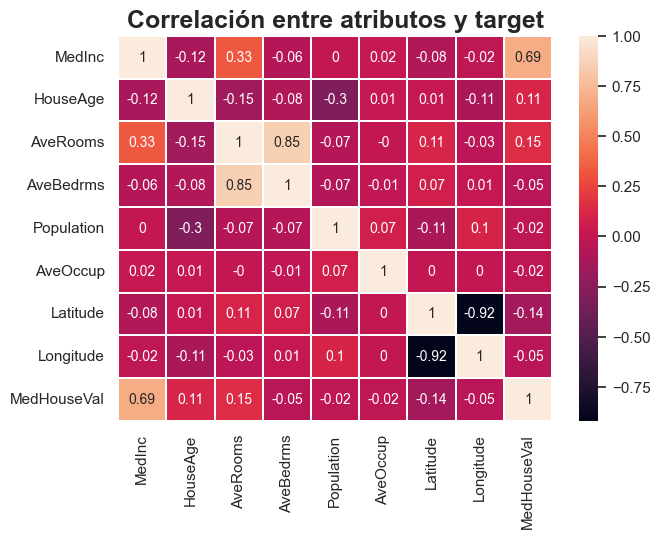

In [23]:
plt.figure(figsize=(7, 5))
matriz_correlacion = df_california.drop('MedHouseVal', axis=1).corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, annot_kws={"size": 10}, 
            linewidth=.1, cmap='vlag').set_title('Correlación entre atributos', 
                                                      size=18, fontweight="bold")

plt.figure(figsize=(7, 5))
matriz_correlacion = df_california.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, annot_kws={"size": 10}, 
            linewidth=.1, cmap='bwr').set_title('Correlación entre atributos y target', 
                                                      size=18, fontweight="bold")
plt.show()

### 2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

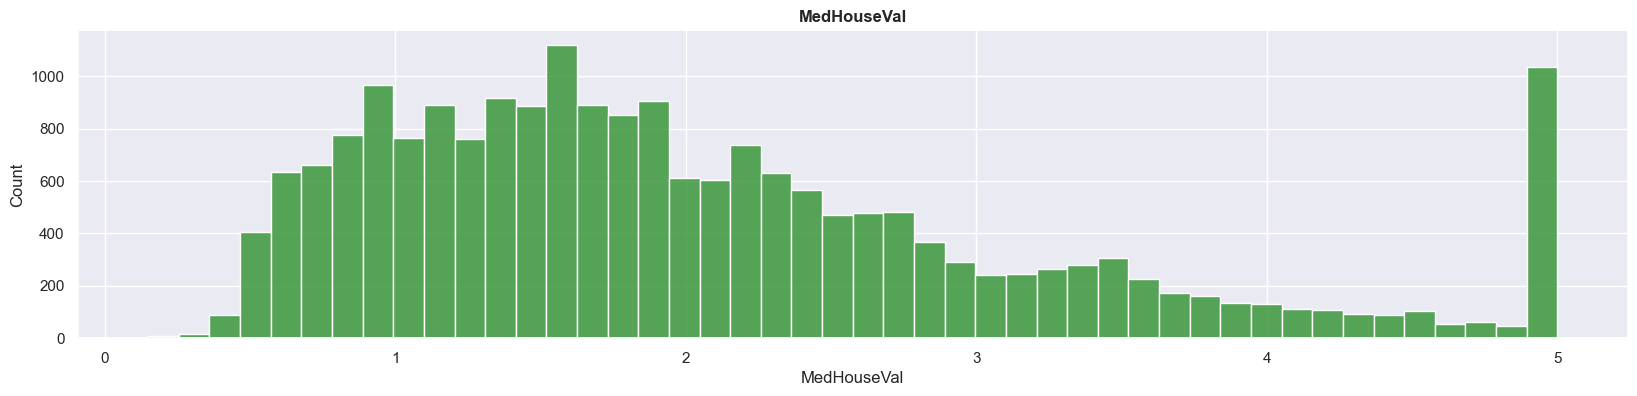

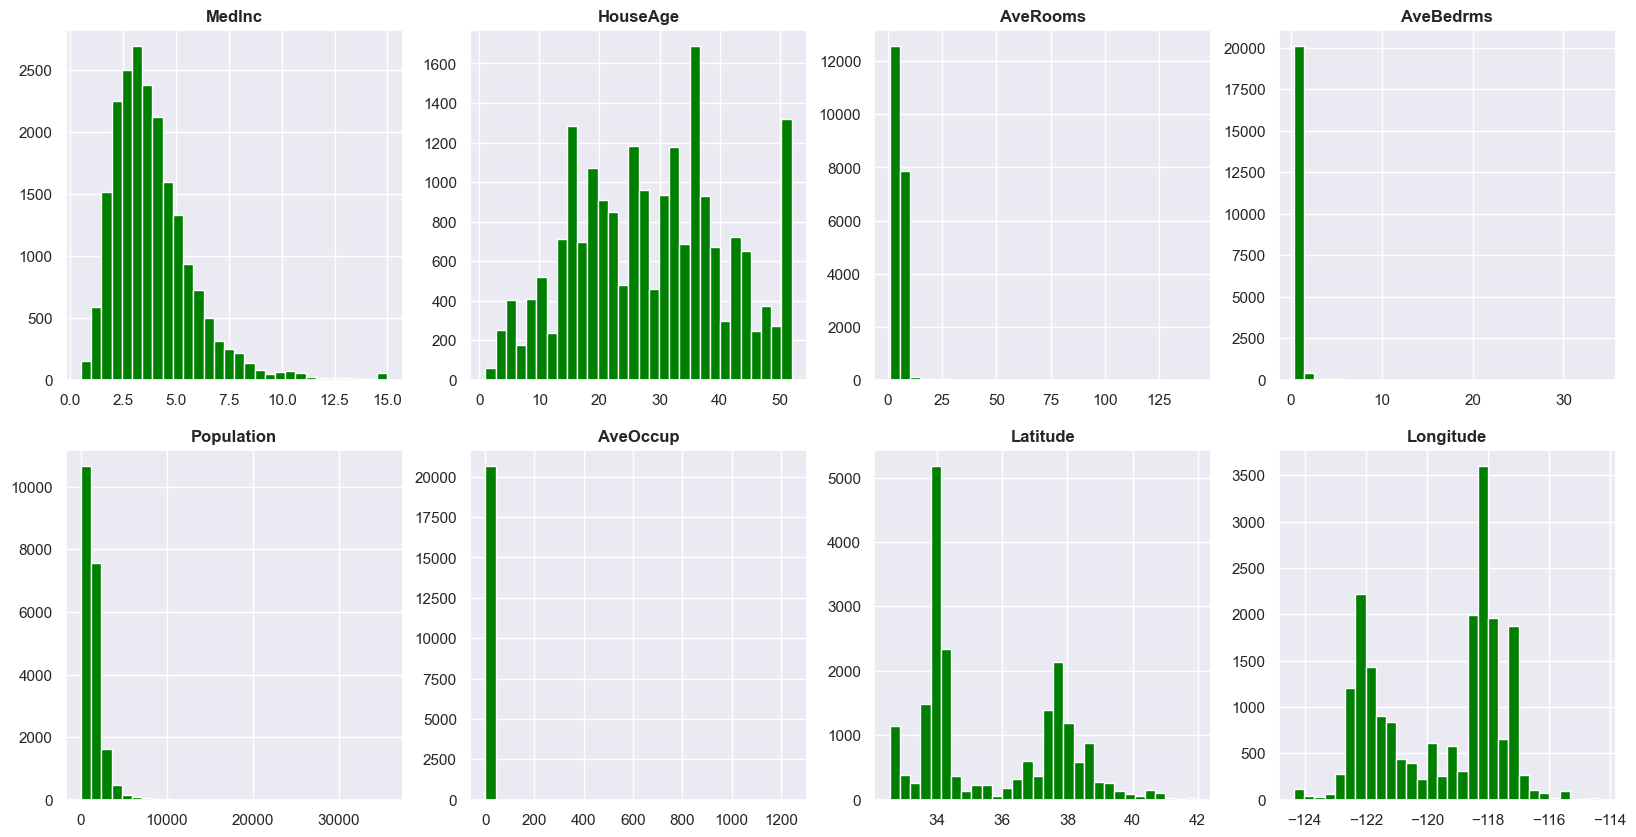

In [9]:
# Histograma del target
plt.figure(figsize=(20, 4))
sns.histplot(df_california['MedHouseVal'], 
             color="forestgreen").set_title('MedHouseVal', size=12, fontweight="bold")

# Histogramas de los atributos
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for ax, column in zip(axs.flatten(), df_california.columns):
    ax.hist(df_california[column], bins=30, color = "green")
    ax.set_title(column, size=12, fontweight="bold")

plt.show()

### 3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [10]:
#Otenemos las predicciones del modelo
y_pred = regresion.predict(x_test_scaled)

In [13]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)


R-cuadrado en test: 0.6073641275490635
Error absoluto medio: 0.529590326550343
Error cuadratico medio: 0.5284738514140467
